# Analyse Multivariée

## Résumé :
- 28% des femmes résilient contre 15.9% pour les hommes.
- L'age moyen homme/femme qui résilient est le même
- L'ancienneté ne semble pas corrélé avec le fait qu'un client résili.
- Les clients possédant 1 produit ont tendance à plus résilié
- Les clients avec 3 et 4 produits résilient majoritairement
- Les clients avec 2 produits sont les plus fidèles
- L'allamagne semble avoir le plus haut taux de résiliation comparer à la France et l'espagne
- Les clients inactifs ont plus tendance à résilier
- Le Score de crédit n'influence pas les clients à résilier
- Une balance de compte élevé à tendance à faire résilier les clients
- Le salaire estimé ne semble pas corrélérer avec la résiliation
- Les clients de plus de 44 ans ont plus tendance à résilier
- Les allemands n'ont que 0.32% de comptes à 0€ comparé à la France (69.19%) et L'Espagne (67%) dans ce jeu de donnée.
-L'âge n'est pas corrélé à l'ancienneté (Tenure) dans ce dataset.
- L'allemagne semble avoir plus de membre inactif que la France et l'Espagne
- France 50.4% de client actif
- Allemagne 46% de client actif
- Espagne 51.1% de client actif
- Les clients allemands ayant 1 produit sont plus nombreux qu'en France et Espagne
- Le nombre de clients possédant 1 ou 2 produits est équitable entre la France et l'Espagne
- Se sont les clients Allemands qui ont le plus 3 et 4 produits aussi
- Les clients allemands ont une médiane de 39 ans
- Les clients Français et Espagnol ont une médiane de 37 ans
- L'age mini pour l'Allemagne, la France et l'Espagne est de 18 ans
- L'age maxi pour l'allemagne est de 83 ans
- l'age maxi pour la France et l'Espagne est de 92 ans
- Il est interressant de noté que les clients allemands les plus agés ont 9 ans de moins que ceux de l'Espagne et la France<br> mais que la moyenne d'age des clients est d'environ 2 ans plus élevé que les clients Français et Espagnol 
- Le solde moyen des clients allemands est de 121 234 € avec une médiane à 122 021 €
- Le solde moyen des clients Français est de 37 376 € avec une médiane à 0 €
- Le solde moyen des clients Espagnols est de 39 986 € avec une médiane à 0 €
- Il y a autant de compte actif que inactif pour les clients ayant un solde égal ou supérieur à 0€
- Les comptes actifs avec un solde supérieur à 0€ ont plus tendances à résilier que ceux ayant un solde égal à 0€
- Les hommes et les femmes ont le même age moyen à 1 an prêt.

Parmi les femmes :
- 49,1 % ont 1 produit
- 48,3 % ont 2 produits
- 2,2 % ont 3 produits
- 0,4 % ont 4 produits

Parmi les hommes :
- 45,2 % ont 1 produit
- 53,2 % ont 2 produits
- 1,4 % ont 3 produits
- 0,2 % ont 4 produits

Hypothèses à tester :

- Les femmes sont plus nombreuses à résilier que les hommes
- Les clients ayant 1 produit sont plus nombreuses à résilier que ceux en ayant 2
- Pour un solde > 0, Les clients allemands sont plus nombreux à résilier que les clients Français et Espagnol
- Les clients actifs sont plus nombreux à résilier que les clients inactif
- Les clients ayant un solde élevée sont plus nombreux à résilier (Attention avec médiane à 0 FR et ES)
- Les clients de 44 ans et plus sont plus nombreux à résilier



# Début de l'analyse multivarié

### Import des packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import du jeu de données d'entraînement

In [3]:
df_train = pd.read_csv("train_data.csv")
df_train = df_train.drop_duplicates(subset="CustomerId", keep="first")
df_train.reset_index(drop=True)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,98611,15592494,Mazzi,431,Germany,Female,33.0,5,152235.92,1,1.0,0.0,109342.82,0
22013,108483,15632987,Zetticci,625,Spain,Female,44.0,2,0.00,1,1.0,1.0,88820.41,0
22014,8752,15571053,Ts'ai,717,France,Female,28.0,7,166501.68,1,1.0,1.0,102730.26,0
22015,151078,15777224,T'ang,622,France,Female,47.0,5,0.00,1,1.0,0.0,144825.50,1


Hypothèses :
- 

1) Détection des variables discrètes et continu
2) Analyse univarié
3) Analyse multivarié
4) Faire des hypothèses et les testées

- Variables discrètes : Gender, Tenure, NumOfProducts, Geography, HasCrCard, IsActiveMember, Exited
- Variables continues : CreditScore, Balance, EstimatedSalary, Age

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22017 entries, 0 to 143551
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22017 non-null  int64  
 1   CustomerId       22017 non-null  int64  
 2   Surname          22017 non-null  object 
 3   CreditScore      22017 non-null  int64  
 4   Geography        22017 non-null  object 
 5   Gender           22017 non-null  object 
 6   Age              22017 non-null  float64
 7   Tenure           22017 non-null  int64  
 8   Balance          22017 non-null  float64
 9   NumOfProducts    22017 non-null  int64  
 10  HasCrCard        22017 non-null  float64
 11  IsActiveMember   22017 non-null  float64
 12  EstimatedSalary  22017 non-null  float64
 13  Exited           22017 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 2.5+ MB


In [5]:
df_train.nunique().sort_values()


Gender                 2
Exited                 2
HasCrCard              2
IsActiveMember         2
Geography              3
NumOfProducts          4
Tenure                11
Age                   66
CreditScore          430
Surname             1872
Balance             8804
EstimatedSalary    16511
CustomerId         22017
ID                 22017
dtype: int64

discrète - discrète

## Analyse de la variable "Gender" avec "Exited"

- 28% des femmes résilient contre 15.9% pour les hommes.
- L'age moyen homme/femme qui résilient est le même

In [6]:
pd.crosstab(df_train["Exited"], df_train["Gender"], normalize='columns')

Gender,Female,Male
Exited,,
0,0.726699,0.840243
1,0.273301,0.159757


Text(0.5, 0.98, 'Répartition des hommes et des femmes ayant résilié 1=oui, 0=non dans ce jeu de donnée')

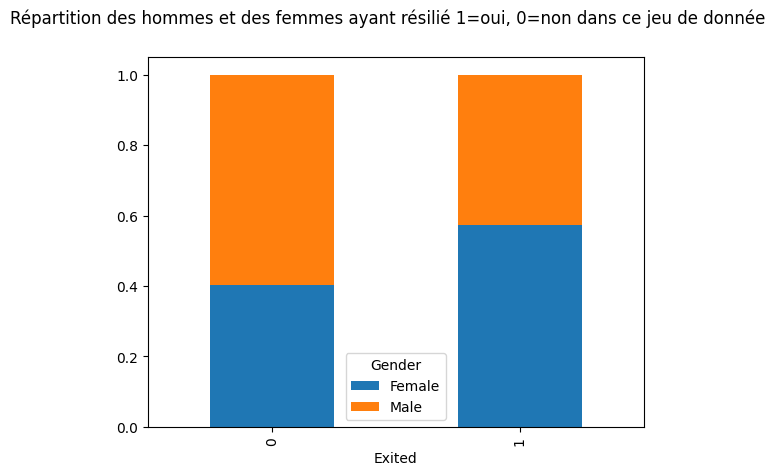

In [7]:
pd.crosstab(df_train["Exited"], df_train["Gender"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des hommes et des femmes ayant résilié 1=oui, 0=non dans ce jeu de donnée")

In [8]:
df_train.query("Gender == 'Female'").groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7025.0,36.623630,8.091526,18.0,32.0,36.0,40.0,80.0
1,2642.0,44.250568,8.973268,19.0,38.0,44.0,50.0,74.0


<Axes: xlabel='Exited'>

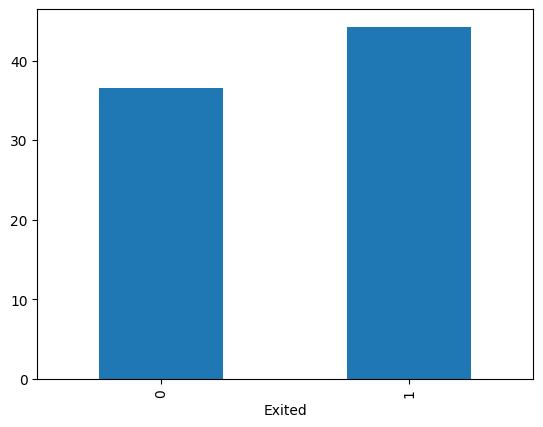

In [9]:
df_train.query("Gender == 'Female'").groupby("Exited")["Age"].mean().plot(kind="bar")

In [10]:
df_train.query("Gender == 'Male'").groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,10377.0,36.461640,8.049306,18.0,31.0,36.0,40.0,92.0
1,1973.0,43.639128,8.883317,18.0,38.0,43.0,49.0,71.0


<Axes: xlabel='Exited'>

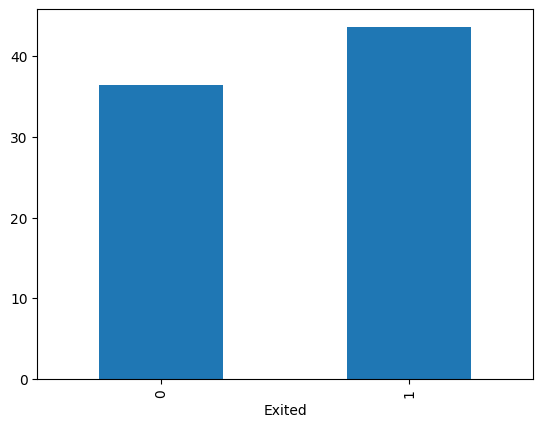

In [58]:
df_train.query("Gender == 'Male'").groupby("Exited")["Age"].mean().plot(kind="bar")

## Analyse de la variable "Tenure" avec "Exited"

- L'ancienneté ne semble pas corrélé avec le fait qu'un client résili.

In [12]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize=True)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.02221,0.080620,0.086660,0.080029,0.082527,0.082209,0.073580,0.085252,0.087705,0.081028,0.028569
1,0.00763,0.022619,0.022392,0.023482,0.023118,0.020938,0.018622,0.019212,0.021801,0.021574,0.008221


<Axes: xlabel='Exited'>

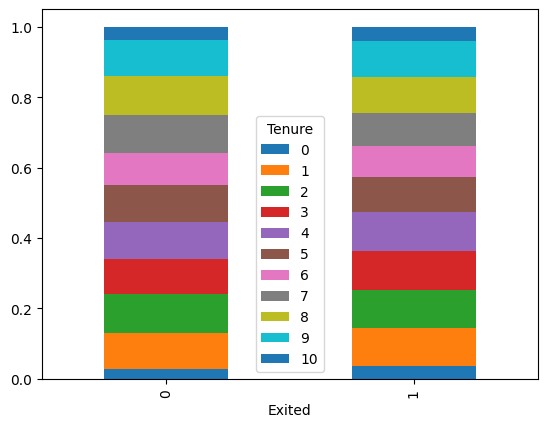

In [13]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "NumOfProducts" avec "Exited"

- Les clients possédant 1 produit ont tendance à plus résilié
- Les clients avec 3 et 4 produits résilient majoritairement
- Les clients avec 2 produits sont les plus fidèles

In [14]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])

NumOfProducts,1,2,3,4
Exited,,,,
0,6978,10374,39,11
1,3505,679,376,55


Text(0.5, 0.98, 'Répartition du nbr de produits souscrit par les clients ayant résilié 1=oui, 0=non dans ce jeu de donnée')

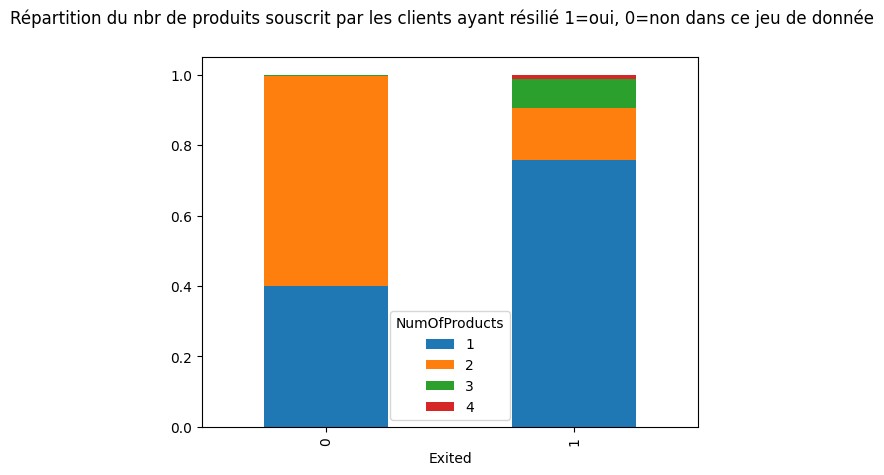

In [15]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition du nbr de produits souscrit par les clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "Geography" avec "Exited"

- L'allamagne semble avoir le plus haut taux de résiliation comparer à la France et l'espagne
 

In [16]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize=True)

Geography,France,Germany,Spain
Exited,,,
0,0.467820,0.138121,0.184448
1,0.091248,0.079757,0.038607


Text(0.5, 0.98, "Répartition géographique entre la France, l'allemagne et l'espagne\n des clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

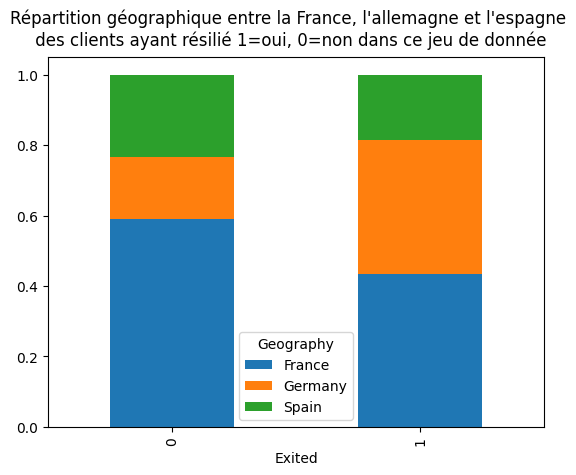

In [17]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition géographique entre la France, l'allemagne et l'espagne\n des clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "HasCrCard" avec "Exited"

- Il ne semble pas y avoir de corrélation sur la résiliation sur le fait qu'un client possède une carte de crédit ou non

In [18]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"])

HasCrCard,0.0,1.0
Exited,,
0,4261,13141
1,1283,3332


Text(0.5, 0.98, 'Répartition des clients ayant résilié 1=oui, 0=non \npossedant une carte de crédit 1=oui, 0=non dans ce jeu de donnée')

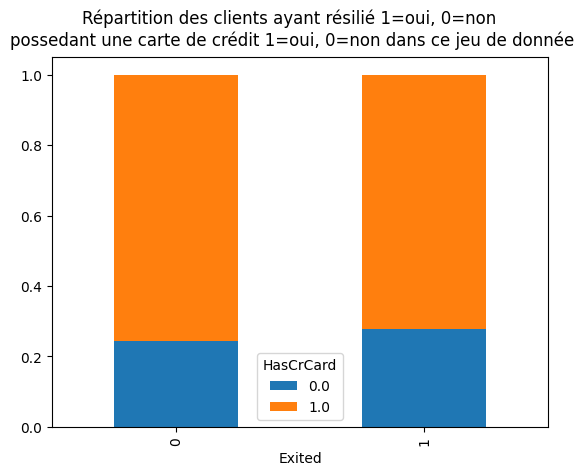

In [19]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des clients ayant résilié 1=oui, 0=non \npossedant une carte de crédit 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "IsActiveMember" avec "Exited"

- Les clients inactifs ont plus tendance à résilier

In [20]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])

IsActiveMember,0.0,1.0
Exited,,
0,7875,9527
1,3190,1425


Text(0.5, 0.98, 'Répartition des clients ayant résilié 1=oui, 0=non \ndans ce jeu de donnée étant actif 1=oui, 0=non')

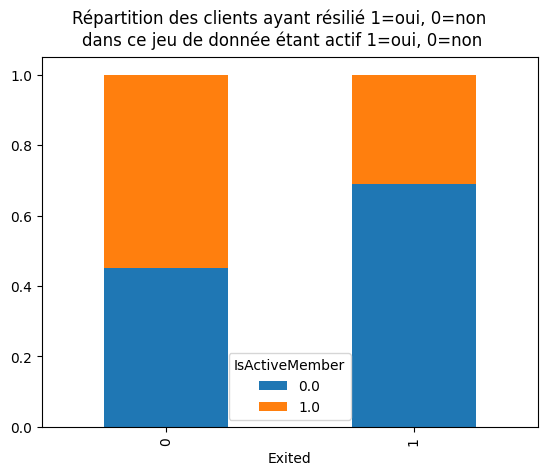

In [21]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des clients ayant résilié 1=oui, 0=non \ndans ce jeu de donnée étant actif 1=oui, 0=non")

continue - discrète

## Analyse de la variable "CreditScore" avec "Exited"

- Le Score de crédit n'influence pas les clients à résilier

Text(0.5, 0.98, 'Moyenne de la variable CreditScore des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

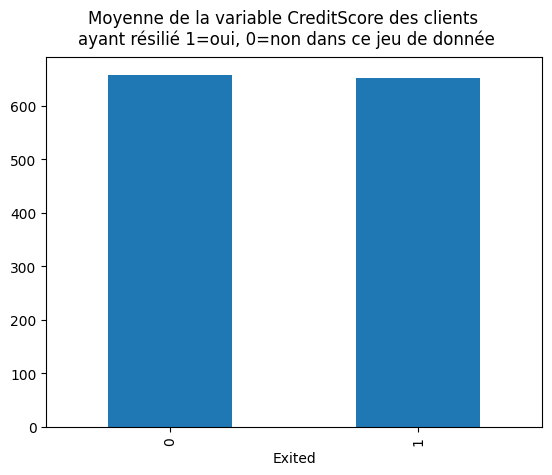

In [22]:
df_train.groupby("Exited")["CreditScore"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la variable CreditScore des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

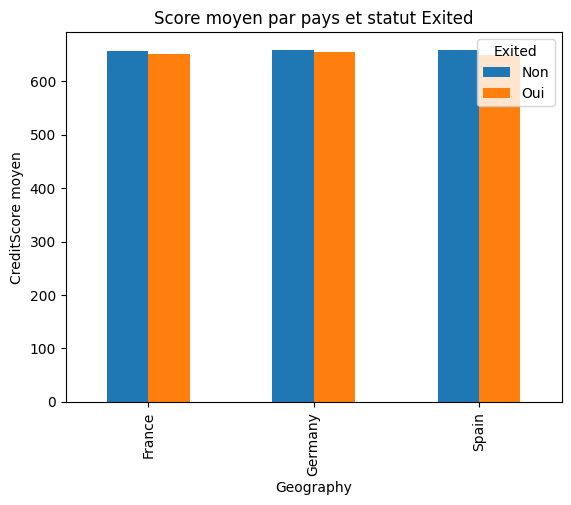

In [23]:
# Exemple : pays dans une colonne "Geography"
df_grouped = df_train.groupby(["Geography", "Exited"])["CreditScore"].mean().unstack()

# Tracé
df_grouped.plot(kind="bar")
plt.ylabel("CreditScore moyen")
plt.title("Score moyen par pays et statut Exited")
plt.legend(title="Exited", labels=["Non", "Oui"])
plt.show()


## Analyse de la variable "Balance" avec "Exited"

- Une balance de compte élevé à tendance à faire résilier les clients

Text(0.5, 0.98, 'Moyenne de la Balance des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

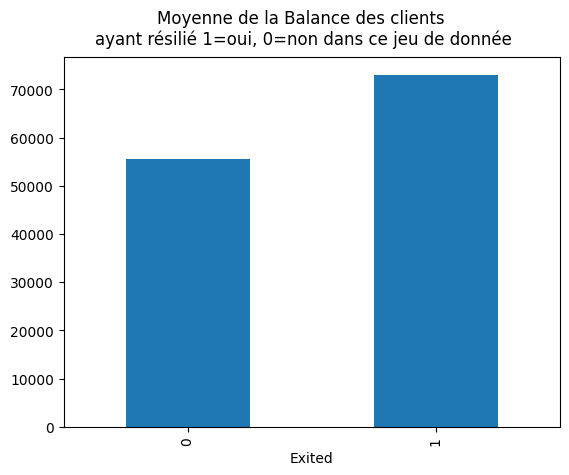

In [24]:
df_train.groupby("Exited")["Balance"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la Balance des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")   

## Analyse de la variable "EstimatedSalary" avec "Exited"

- Le salaire estimé ne semble pas corrélérer avec la résiliation

Text(0.5, 0.98, 'Moyenne de la variable EstimatedSalary des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

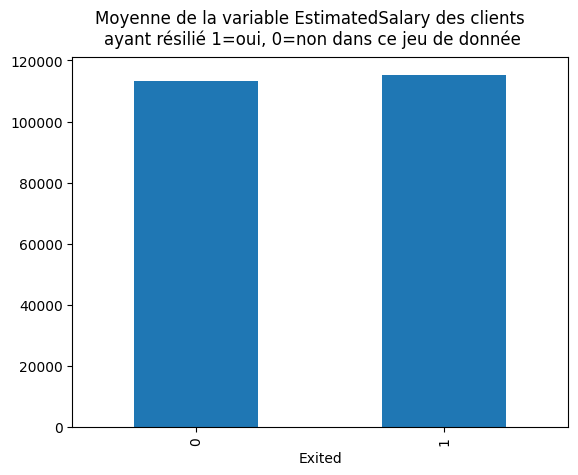

In [25]:
df_train.groupby("Exited")["EstimatedSalary"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la variable EstimatedSalary des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "Age" avec "Exited"

- Les clients de plus de 44 ans ont plus tendance à résilier

In [59]:
df_train.groupby("Exited")["Age"].median()

Exited
0    36.0
1    44.0
Name: Age, dtype: float64

Text(0.5, 0.98, 'Médiane de la variable Age des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

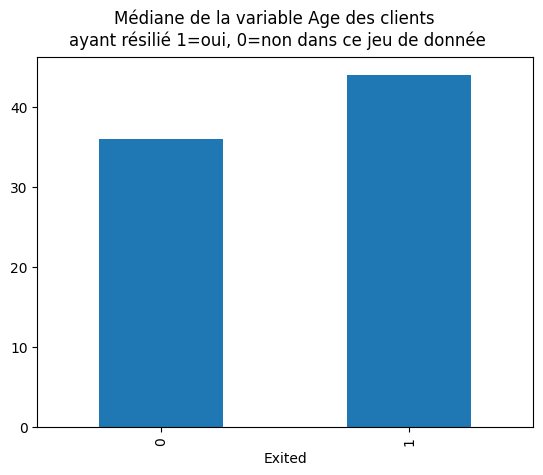

In [60]:
df_train.groupby("Exited")["Age"].median().plot(kind="bar")
plt.suptitle("Médiane de la variable Age des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

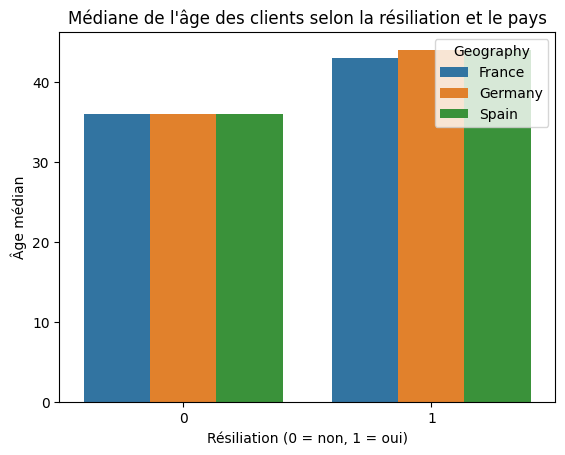

In [28]:
# Moyenne d'âge par pays et par statut de résiliation
grouped = df_train.groupby(["Geography", "Exited"])["Age"].median().reset_index()

# Affichage en barplot
sns.barplot(data=grouped, x="Exited", y="Age", hue="Geography")

plt.title("Médiane de l'âge des clients selon la résiliation et le pays")
plt.xlabel("Résiliation (0 = non, 1 = oui)")
plt.ylabel("Âge médian")
plt.show()

# En +

## 1. Y a-t-il une corrélation entre le CreditScore et Geography ?

- A priori non

In [29]:
df_train.groupby("Geography")["CreditScore"].mean()


Geography
France     656.644569
Germany    657.698979
Spain      656.846671
Name: CreditScore, dtype: float64

## 2. Corrélation entre Balance et Age et Geography?

- Les allemands n'ont que 0.32% de comptes à 0€ comparé à la France (69.19%) et L'Espagne (67%) dans ce jeu de donnée.

<Axes: xlabel='Age', ylabel='Balance'>

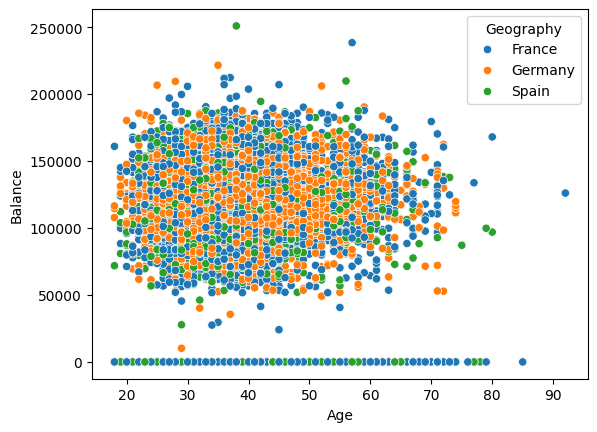

In [30]:
sns.scatterplot(data=df_train, x="Age", y="Balance", hue="Geography")


In [31]:
nbrClientAllemand = df_train.query("Geography == 'Germany'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'Germany' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Allemands, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 4797 clients Allemands, 0.21% ont un solde égal à 0


In [32]:
nbrClientAllemand = df_train.query("Geography == 'France'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'France' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Français, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 12309 clients Français, 65.8% ont un solde égal à 0


In [33]:
nbrClientAllemand = df_train.query("Geography == 'Spain'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'Spain' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Espagnol, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 4911 clients Espagnol, 64.69% ont un solde égal à 0


In [34]:
df_train.query("Balance == 0").groupby("Geography")["Balance"].count()

Geography
France     8099
Germany      10
Spain      3177
Name: Balance, dtype: int64

<Axes: xlabel='Geography'>

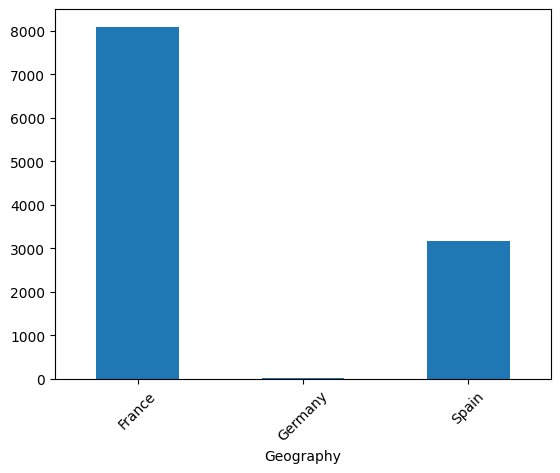

In [35]:
df_train.query("Balance == 0").groupby("Geography")["Balance"].count().plot(kind="bar", rot=45)


## 3. Corrélation entre l'ancienneté et l'âge

-L'âge n'est pas corrélé à l'ancienneté (Tenure) dans ce dataset.

In [36]:
df_train.groupby("Tenure")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Tenure,,,,,,,,
0,657.0,38.578387,8.773941,21.0,33.0,37.0,44.0,75.0
1,2273.0,38.159894,8.984271,19.0,32.0,37.0,43.0,92.0
2,2401.0,37.909204,8.588175,18.0,32.0,37.0,42.0,79.0
3,2279.0,37.885476,8.642777,18.0,32.0,37.0,42.0,72.0
4,2326.0,38.211952,8.951927,18.0,32.0,37.0,43.0,74.0
5,2271.0,38.096874,8.945323,19.0,32.0,37.0,42.0,79.0
6,2030.0,38.100000,8.874535,18.0,32.0,37.0,42.0,74.0
7,2300.0,37.959130,8.590438,18.0,32.0,37.0,42.0,80.0
8,2411.0,38.070095,8.691321,18.0,32.0,37.0,42.0,80.0


In [37]:
df_train[["Age", "Tenure"]].corr()


,Age,Tenure
Age,1.000000,0.001435
Tenure,0.001435,1.000000


<Axes: xlabel='Tenure', ylabel='Age'>

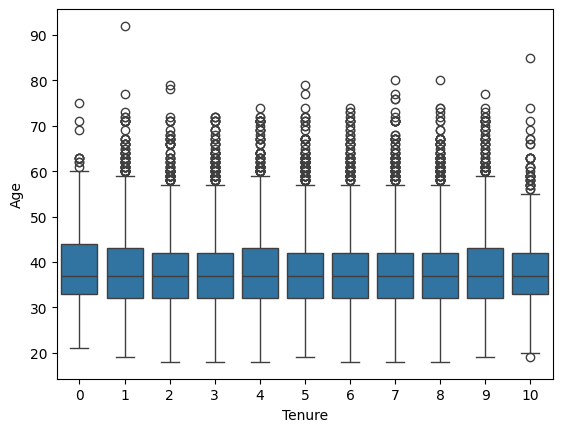

In [38]:
sns.boxplot(x="Tenure", y="Age", data=df_train)

## 4. Y a-t-il une corrélation avec la variable "Geography" et "IsActiveMember"

- L'allemagne semble avoir plus de membre inactif que la France et l'Espagne
- France 50.4% de client actif
- Allemagne 46% de client actif
- Espagne 51.1% de client actif

In [39]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index")


IsActiveMember,0.0,1.0
Geography,,
France,0.493866,0.506134
Germany,0.546383,0.453617
Spain,0.481572,0.518428


<Axes: xlabel='Geography'>

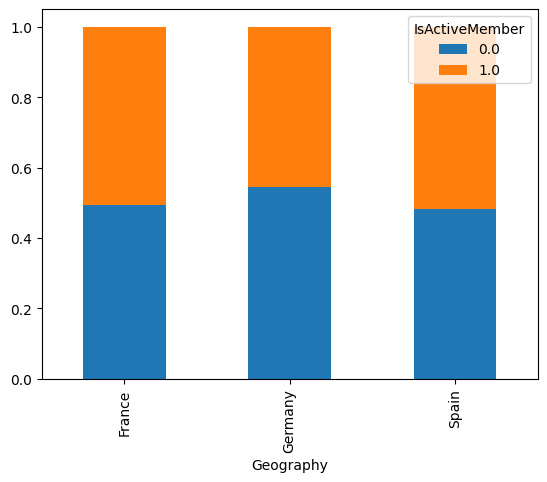

In [40]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

## 5. Y a-t-il une corrélation avec la variable "Geography" et "NumOfProducts"

- Les clients allemands ayant 1 produit sont plus nombreux qu'en France et Espagne
- Le nombre de clients possédant 1 ou 2 produits est équitable entre la France et l'Espagne
- Se sont les clients Allemands qui ont le plus 3 et 4 produits aussi

In [41]:
df_train.groupby("Geography")["NumOfProducts"].value_counts(normalize=True).unstack()


NumOfProducts,1,2,3,4
Geography,,,,
France,0.446340,0.537818,0.013730,0.002112
Germany,0.582239,0.381697,0.030436,0.005629
Spain,0.447159,0.529831,0.020362,0.002647


<Axes: xlabel='Geography'>

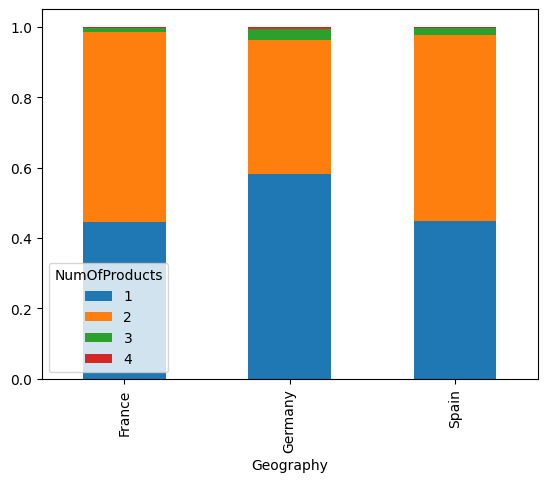

In [42]:
pd.crosstab(df_train["Geography"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)

## 6. Y a-t-il une corrélation avec la variable "Geography" et "Age"

- Les clients allemands ont une médiane de 39 ans
- Les clients Français et Espagnol ont une médiane de 37 ans
- L'age mini pour l'Allemagne, la France et l'Espagne est de 18 ans
- L'age maxi pour l'allemagne est de 83 ans
- l'age maxi pour la France et l'Espagne est de 92 ans

- Il est interressant de noté que les clients allemands les plus agés ont 9 ans de moins que ceux de l'Espagne et la France<br> mais que la moyenne d'age des clients est d'environ 2 ans plus élevé que les clients Français et Espagnol 

In [43]:
df_train.groupby("Geography")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,12309.0,37.64298,8.643738,18.0,32.0,36.0,42.0,92.0
Germany,4797.0,39.43694,8.967416,18.0,33.0,39.0,45.0,74.0
Spain,4911.0,37.90002,8.883495,18.0,32.0,37.0,42.0,80.0


<Axes: xlabel='Geography'>

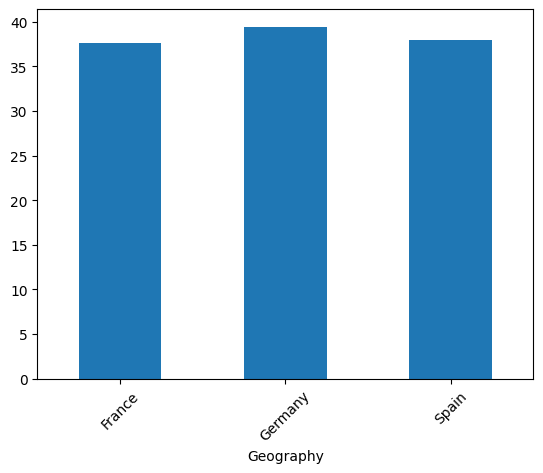

In [44]:
df_train.groupby("Geography")["Age"].mean().plot(kind="bar", rot=45)

## 7. Y a-t-il une corrélation avec la variable "Geography" et "Balance"

- Le solde moyen des clients allemands est de 121 234 € avec une médiane à 122 021 €
- Le solde moyen des clients Français est de 37 376 € avec une médiane à 0 €
- Le solde moyen des clients Espagnols est de 39 986 € avec une médiane à 0 €

In [45]:
df_train.groupby("Geography")["Balance"].describe()


,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,12309.0,41662.119495,59841.949164,0.0,0.00,0.00,105209.540,238387.56
Germany,4797.0,121676.913950,22504.335295,0.0,107716.57,122221.19,136100.690,221532.80
Spain,4911.0,42520.321658,59592.750838,0.0,0.00,0.00,105545.795,250898.09


<Axes: xlabel='Geography'>

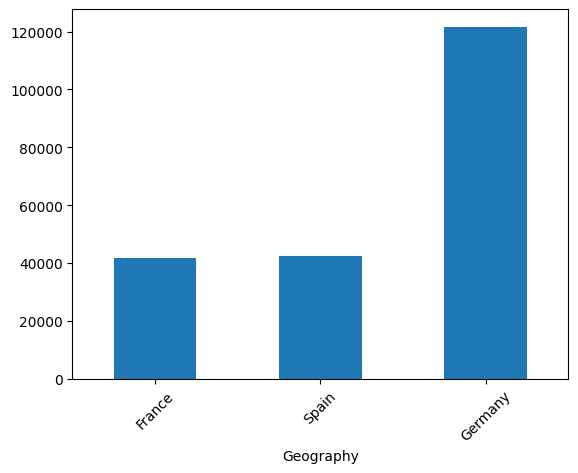

In [46]:
df_train.groupby("Geography")["Balance"].mean().sort_values().plot(kind="bar", rot=45)

## 8. Y a-t-il une corrélation avec la variable "IsActiveMember" et "Balance"

- Il y a autant de compte actif que inactif pour les clients ayant un solde égal ou supérieur à 0€
- Les comptes actifs avec un solde supérieur à 0€ ont plus tendances à résilier que ceux ayant un solde égal à 0€

In [47]:
df_train.query("Balance == 0")["IsActiveMember"].value_counts(normalize=True)


IsActiveMember
1.0    0.50319
0.0    0.49681
Name: proportion, dtype: float64

In [48]:
pd.crosstab(df_train.query("Balance == 0")["Geography"], df_train["IsActiveMember"], normalize=True)

IsActiveMember,0.0,1.0
Geography,,
France,0.357523,0.360092
Germany,0.000620,0.000266
Spain,0.138667,0.142832


<Axes: xlabel='Geography'>

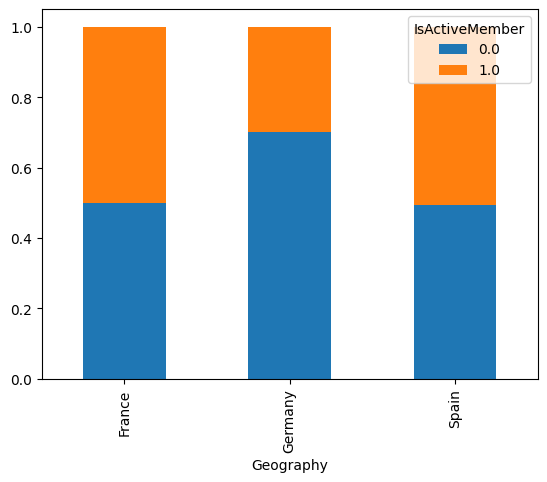

In [49]:
pd.crosstab(df_train.query("Balance == 0")["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

In [50]:
pd.crosstab(df_train.query("Balance > 0")["Geography"], df_train["IsActiveMember"], normalize=True)


IsActiveMember,0.0,1.0
Geography,,
France,0.190476,0.201845
Germany,0.243593,0.202497
Spain,0.074550,0.087038


<Axes: xlabel='Geography'>

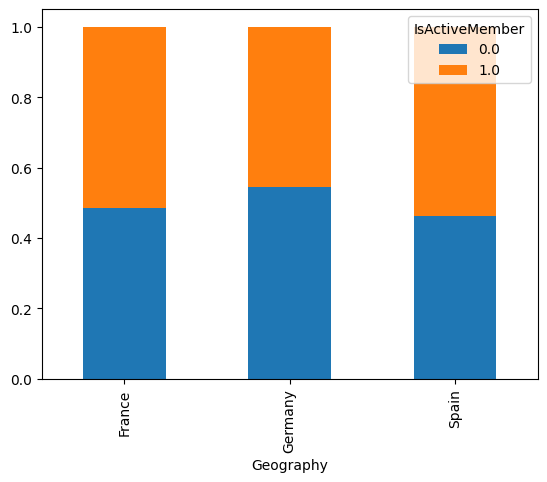

In [51]:
pd.crosstab(df_train.query("Balance > 0")["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

In [52]:
df_train.query("Balance == 0")["Exited"].value_counts(normalize=True)


Exited
0    0.836523
1    0.163477
Name: proportion, dtype: float64

In [53]:
df_train.query("Balance > 0")["Exited"].value_counts(normalize=True)


Exited
0    0.741869
1    0.258131
Name: proportion, dtype: float64

## Gender vs Age

- Les hommes et les femmes ont le même age moyen à 1 an prêt.

In [54]:
df_train.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,9667.0,38.708079,9.007298,18.0,33.0,38.0,43.0,80.0
Male,12350.0,37.608295,8.599828,18.0,32.0,36.0,42.0,92.0


<Axes: xlabel='Gender'>

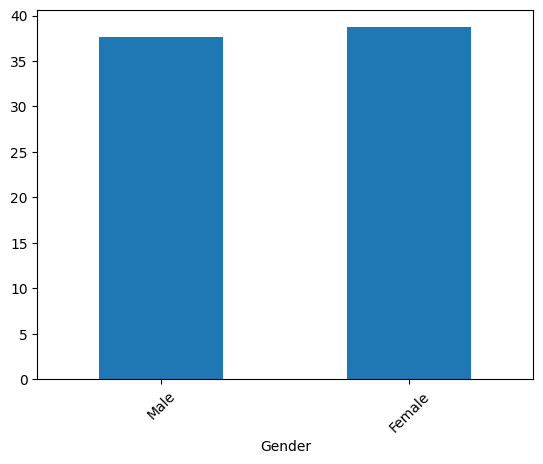

In [55]:
df_train.groupby("Gender")["Age"].mean().sort_values().plot(kind="bar", rot=45)

## Gender vs NumOfProducts

Parmi les femmes :
- 49,1 % ont 1 produit
- 48,3 % ont 2 produits
- 2,2 % ont 3 produits
- 0,4 % ont 4 produits

Parmi les hommes :
- 45,2 % ont 1 produit
- 53,2 % ont 2 produits
- 1,4 % ont 3 produits
- 0,2 % ont 4 produits

In [56]:
pd.crosstab(df_train["Gender"], df_train["NumOfProducts"], normalize="index")

NumOfProducts,1,2,3,4
Gender,,,,
Female,0.497259,0.474604,0.024103,0.004034
Male,0.459595,0.523482,0.014737,0.002186


<Axes: xlabel='Gender'>

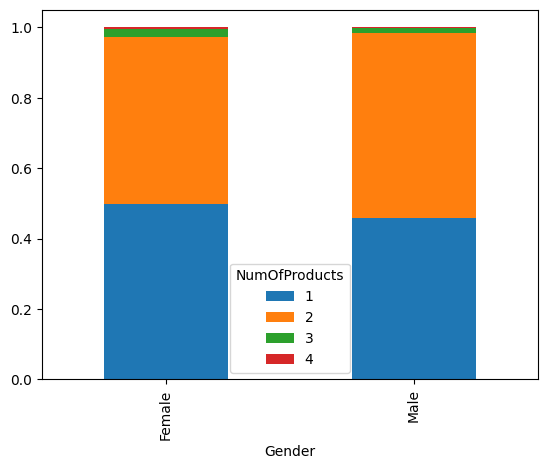

In [57]:
pd.crosstab(df_train["Gender"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)